In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
from pylab import rcParams

In [2]:
train = pd.read_csv('Data_Train.csv')
test = pd.read_csv('Data_Test.csv')

# getting the shapes of the datasets
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)

Shape of Train : (87500, 30)
Shape of Test : (37500, 29)


In [3]:
train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [4]:
test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [5]:
train.columns = train.columns.str.strip().str.replace(' ', '_')
test.columns = test.columns.str.strip().str.replace(' ', '_')

In [6]:
# let's decsribe the train set

train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,87500.0,8.394625e+04,3.610010e+04,21560.0,5.261675e+04,8.390000e+04,1.152612e+05,1.465590e+05
Asst_Reg,87500.0,3.798914e+06,2.289038e+06,24847.0,1.483874e+06,4.132010e+06,5.952909e+06,7.351847e+06
Yearly_Income,81925.0,1.348596e+05,9.882473e+04,8800.0,8.324659e+04,1.144000e+05,1.601600e+05,8.264031e+06
Unpaid_2_years,87500.0,3.329371e-01,8.760799e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01
Already_Defaulted,87500.0,5.725714e-03,8.350455e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
Debt_to_Income,84011.0,3.094266e+01,1.407981e+01,0.0,2.042880e+01,3.013920e+01,4.090800e+01,6.392904e+02
Postal_Code,86111.0,5.115539e+04,3.121123e+04,1000.0,2.290000e+04,4.770000e+04,8.020000e+04,9.990000e+04
Lend_Amount,87500.0,2.592054e+04,1.443384e+04,1710.0,1.504800e+04,2.394000e+04,3.420000e+04,5.985000e+04
Deprecatory_Records,87500.0,2.024000e-01,6.464135e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.600000e+01
Interest_Charged,87500.0,1.651837e+01,4.902011e+00,8.0,1.231000e+01,1.649000e+01,2.077000e+01,2.500000e+01


In [7]:
# let's decsribe the train set

test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,37500.0,1.841439e+05,2.168322e+04,146560.0,1.653412e+05,1.842570e+05,2.028692e+05,221557.000
Asst_Reg,37500.0,3.804858e+06,2.284115e+06,37522.0,1.495828e+06,4.134010e+06,5.934898e+06,7351969.000
Yearly_Income,35075.0,1.340308e+05,1.000845e+05,8800.0,8.419400e+04,1.144000e+05,1.584000e+05,8800000.000
Unpaid_2_years,37500.0,3.364267e-01,8.876400e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,18.000
Already_Defaulted,37500.0,5.306667e-03,7.796581e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000
Debt_to_Income,35989.0,3.091903e+01,1.387167e+01,0.0,2.047920e+01,3.018960e+01,4.072320e+01,116.508
Postal_Code,36889.0,5.123395e+04,3.125043e+04,1000.0,2.290000e+04,4.780000e+04,8.020000e+04,99900.000
Lend_Amount,37500.0,2.582800e+04,1.440206e+04,1710.0,1.491975e+04,2.381175e+04,3.420000e+04,59850.000
Deprecatory_Records,37500.0,2.000800e-01,5.631369e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,21.000
Interest_Charged,37500.0,1.651101e+01,4.912595e+00,8.0,1.225000e+01,1.651500e+01,2.077000e+01,25.000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly_Income        35075 non-null  float64
 6   Home_Status          37500 non-null  object 
 7   Unpaid_2_years       37500 non-null  int64  
 8   Already_Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt_to_Income       35989 non-null  float64
 11  Postal_Code          36889 non-null  float64
 12  Lend_Amount          37500 non-null  float64
 13  Deprecatory_Records  37500 non-null  int64  
 14  Interest_Charged     37500 non-null  float64
 15  Usage_Rate           37500 non-null 

In [10]:
# checking if there exists any NULL values in the train set

train.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly_Income          5575
Home_Status               0
Unpaid_2_years            0
Already_Defaulted         0
Designation            1414
Debt_to_Income         3489
Postal_Code            1389
Lend_Amount               0
Deprecatory_Records       0
Interest_Charged          0
Usage_Rate                0
Inquiries                 0
Present_Balance           0
Gross_Collection          0
Sub_GGGrade               0
File_Status               0
State                     0
Account_Open              0
Total_Unpaid_CL        4186
Duration                  0
Unpaid_Amount          4852
Reason                    0
Claim_Type                0
Due_Fee                   0
Loan/No_Loan              0
dtype: int64

In [11]:
# checking if there exists any NULL values in the test set

test.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly_Income          2425
Home_Status               0
Unpaid_2_years            0
Already_Defaulted         0
Designation             586
Debt_to_Income         1511
Postal_Code             611
Lend_Amount               0
Deprecatory_Records       0
Interest_Charged          0
Usage_Rate                0
Inquiries                 0
Present_Balance           0
Gross_Collection          0
Sub_GGGrade               0
File_Status               0
State                     0
Account_Open              0
Total_Unpaid_CL        1814
Duration                  0
Unpaid_Amount          2069
Reason                    0
Claim_Type                0
Due_Fee                   0
dtype: int64

In [12]:
# filling the missing values in train as well as test set

In [13]:
# Replacing missing values from the selected columns with mean

train['Postal_Code'].fillna(train['Postal_Code'].mean(), inplace=True)
train['Yearly_Income'].fillna(train['Yearly_Income'].median(), inplace=True)
train['Debt_to_Income'].fillna(train['Debt_to_Income'].median(), inplace=True)
train['Total_Unpaid_CL'].fillna(train['Total_Unpaid_CL'].median(), inplace=True)
train['Unpaid_Amount'].fillna(train['Unpaid_Amount'].median(), inplace=True)
train['Designation'].fillna(train['Designation'].mode()[0], inplace=True)

test['Postal_Code'].fillna(test['Postal_Code'].mean(), inplace=True)
test['Yearly_Income'].fillna(test['Yearly_Income'].median(), inplace=True)
test['Debt_to_Income'].fillna(test['Debt_to_Income'].median(), inplace=True)
test['Total_Unpaid_CL'].fillna(test['Total_Unpaid_CL'].median(), inplace=True)
test['Unpaid_Amount'].fillna(test['Unpaid_Amount'].median(), inplace=True)
test['Designation'].fillna(test['Designation'].mode()[0], inplace=True)


# let's check if there is any null values still left or not
print("Null values left in the train set:", train.isnull().sum().sum())
print("Null values left in the test set:", test.isnull().sum().sum())

Null values left in the train set: 0
Null values left in the test set: 0


In [14]:
# let's save the unique id of the test set and labels set

unique_id = test['ID']
y_train_t = train.iloc[:, -1]

# let's delete the last column from the dataset to  concat train and test
train = train.drop(['Loan/No_Loan'], axis = 1)

# shape of train
train.shape

(87500, 29)

In [15]:
# lets concat the train and test sets for preprocessing and visualizations

data = pd.concat([train, test], axis = 0)

# let's check the shape
data.shape

(125000, 29)

In [16]:
# checking the columns names of the data

data.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly_Income', 'Home_Status', 'Unpaid_2_years', 'Already_Defaulted',
       'Designation', 'Debt_to_Income', 'Postal_Code', 'Lend_Amount',
       'Deprecatory_Records', 'Interest_Charged', 'Usage_Rate', 'Inquiries',
       'Present_Balance', 'Gross_Collection', 'Sub_GGGrade', 'File_Status',
       'State', 'Account_Open', 'Total_Unpaid_CL', 'Duration', 'Unpaid_Amount',
       'Reason', 'Claim_Type', 'Due_Fee'],
      dtype='object')

In [17]:
numerics = ['int64','float64']
data.select_dtypes(include=numerics).head()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee
0,95074,421802,633600.00,0,0,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,17,58598.0,31216.05,0.0
1,134131,3964312,85483.20,0,0,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,15,18924.0,11660.49,0.0
2,92602,4247560,79200.00,0,0,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,7,15604.0,5637.87,0.0
3,22591,197179,61600.00,0,0,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,9,22410.0,15607.17,0.0
4,125060,4646684,68053.92,0,0,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,10,36022.0,27472.86,0.0


In [18]:
column_list = ['Asst_Reg','Yearly_Income','Unpaid_2_years','Already_Defaulted','Debt_to_Income',\
                  'Lend_Amount','Deprecatory_Records','Interest_Charged','Usage_Rate','Inquiries',\
                  'Present_Balance','Gross_Collection','Sub_GGGrade','Account_Open','Total_Unpaid_CL',\
                  'Unpaid_Amount','Due_Fee']

In [19]:
for i in column_list:
    data[i] = data[i]+1

In [20]:
data.select_dtypes(include=numerics).head()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee
0,95074,421803,633601.00,1,1,13.5496,91300.0,42024.25,1,16.39,89.924,4,607162.90,1.0,20,18,58599.0,31217.05,1.0
1,134131,3964313,85484.20,1,1,10.0048,27400.0,38134.00,1,10.94,103.856,1,269235.06,1.0,31,16,18925.0,11661.49,1.0
2,92602,4247561,79201.00,1,1,25.9144,32800.0,17101.00,1,23.35,61.372,1,22477.53,1.0,26,8,15605.0,5638.87,1.0
3,22591,197180,61601.00,1,1,17.5816,7000.0,5131.00,1,11.36,117.272,2,15243.09,1.0,23,10,22411.0,15608.17,1.0
4,125060,4646685,68054.92,1,1,41.0512,70800.0,19666.00,1,14.68,128.280,2,65434.94,1.0,33,11,36023.0,27473.86,1.0


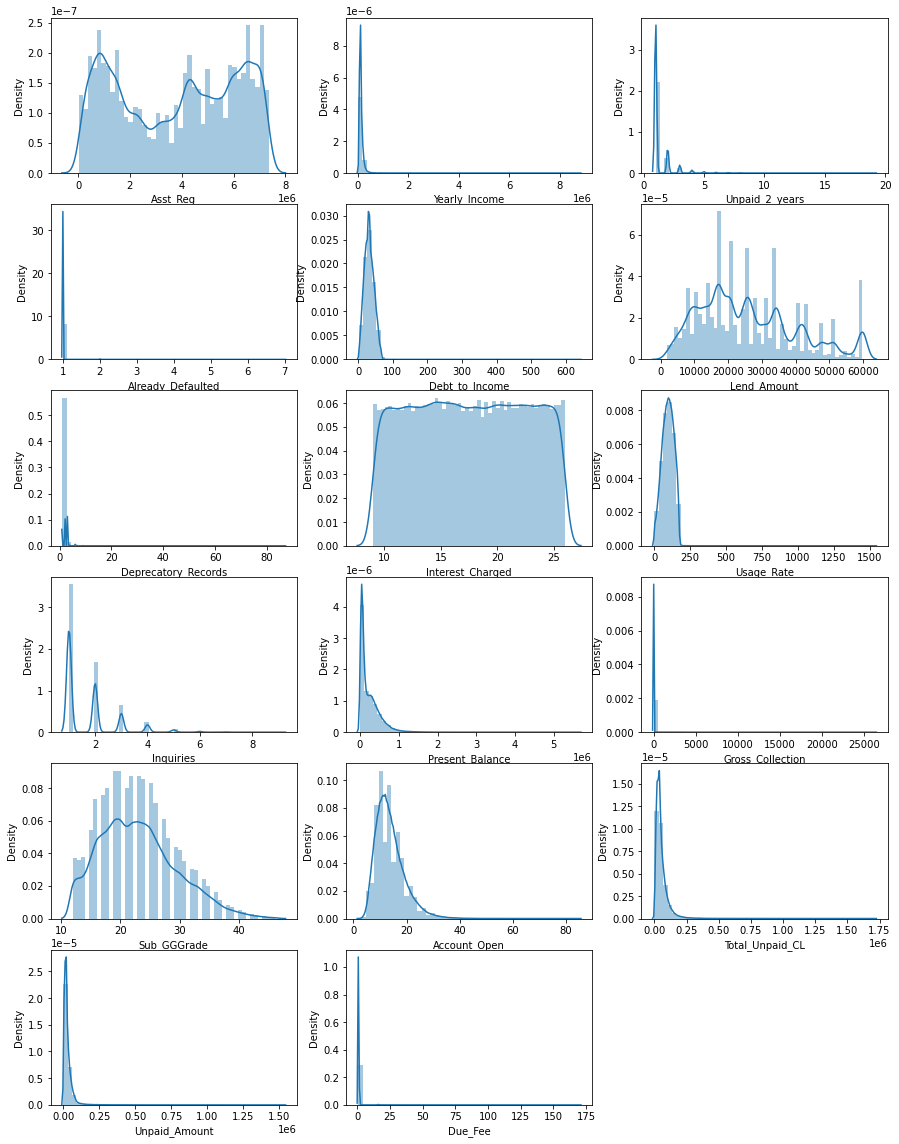

In [21]:
# check the distribution of disbursed amount
# Before log transformation

plt.figure(figsize=(15, 20))

plt.subplot(6, 3, 1)
sns.distplot(data['Asst_Reg'])

plt.subplot(6, 3, 2)
sns.distplot(data['Yearly_Income'])

plt.subplot(6, 3, 3)
sns.distplot(data['Unpaid_2_years'])

plt.subplot(6, 3, 4)
sns.distplot(data['Already_Defaulted'])

plt.subplot(6, 3, 5)
sns.distplot(data['Debt_to_Income'])

plt.subplot(6, 3, 6)
sns.distplot(data['Lend_Amount'])

plt.subplot(6, 3, 7)
sns.distplot(data['Deprecatory_Records'])

plt.subplot(6, 3, 8)
sns.distplot(data['Interest_Charged'])

plt.subplot(6, 3, 9)
sns.distplot(data['Usage_Rate'])

plt.subplot(6, 3, 10)
sns.distplot(data['Inquiries'])

plt.subplot(6, 3, 11)
sns.distplot(data['Present_Balance'])

plt.subplot(6, 3, 12)
sns.distplot(data['Gross_Collection'])

plt.subplot(6, 3, 13)
sns.distplot(data['Sub_GGGrade'])

plt.subplot(6, 3, 14)
sns.distplot(data['Account_Open'])

plt.subplot(6, 3, 15)
sns.distplot(data['Total_Unpaid_CL'])

plt.subplot(6, 3, 16)
sns.distplot(data['Unpaid_Amount'])

plt.subplot(6, 3, 17)
sns.distplot(data['Due_Fee'])

plt.show()

In [22]:
# performing log transformations of variables

data['Asst_Reg'] = np.log(data['Asst_Reg'])
data['Yearly_Income'] = np.log(data['Yearly_Income'])
data['Unpaid_2_years'] = np.log(data['Unpaid_2_years'])
data['Already_Defaulted'] = np.log(data['Already_Defaulted'])
data['Debt_to_Income'] = np.log(data['Debt_to_Income'])
data['Lend_Amount'] = np.log(data['Lend_Amount'])
data['Deprecatory_Records'] = np.log(data['Deprecatory_Records'])
data['Interest_Charged'] = np.log(data['Interest_Charged'])
data['Usage_Rate'] = np.log(data['Usage_Rate'])
data['Inquiries'] = np.log(data['Inquiries'])
data['Present_Balance'] = np.log(data['Present_Balance'])
data['Gross_Collection'] = np.log(data['Gross_Collection'])
data['Sub_GGGrade'] = np.log(data['Sub_GGGrade'])
data['Account_Open'] = np.log(data['Account_Open'])
data['Total_Unpaid_CL'] = np.log(data['Total_Unpaid_CL'])
data['Unpaid_Amount'] = np.log(data['Unpaid_Amount'])
data['Due_Fee'] = np.log(data['Due_Fee'])

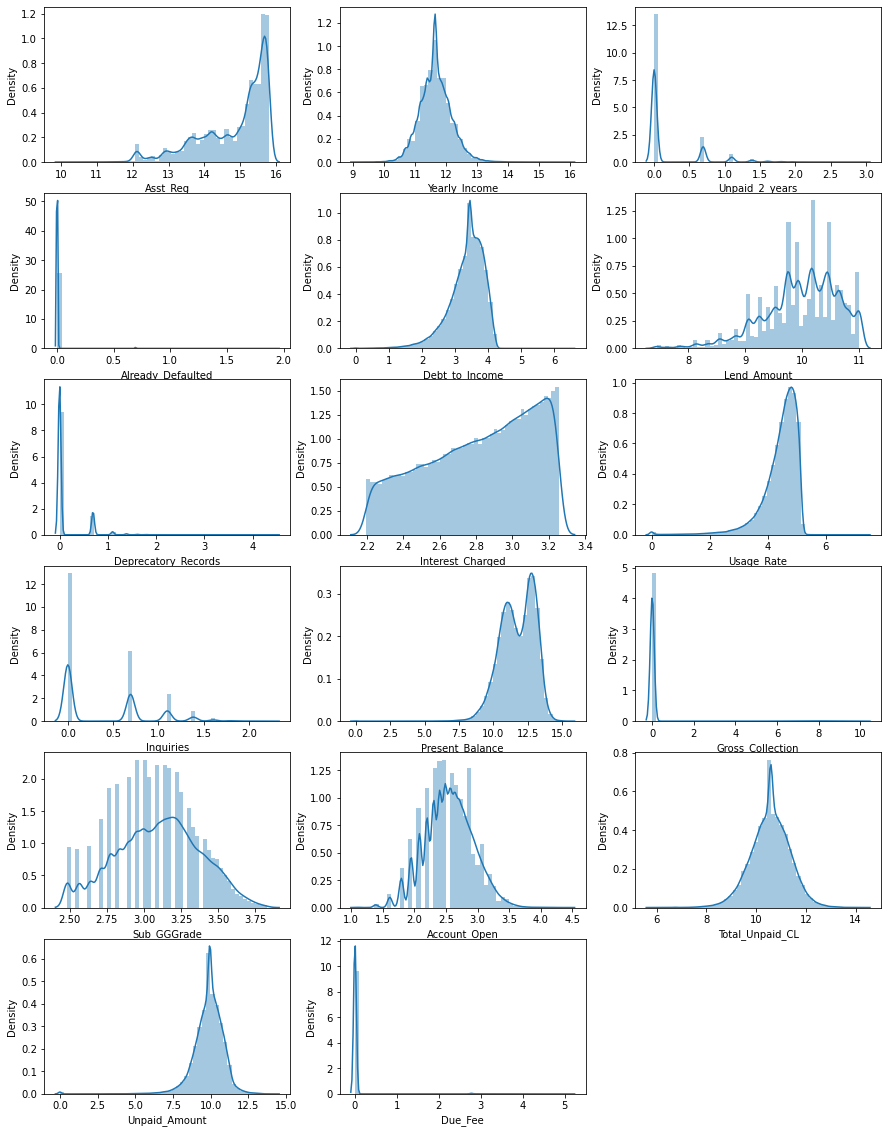

In [23]:
# check the distribution of disbursed amount
# After log transformation

plt.figure(figsize=(15, 20))

plt.subplot(6, 3, 1)
sns.distplot(data['Asst_Reg'])

plt.subplot(6, 3, 2)
sns.distplot(data['Yearly_Income'])

plt.subplot(6, 3, 3)
sns.distplot(data['Unpaid_2_years'])

plt.subplot(6, 3, 4)
sns.distplot(data['Already_Defaulted'])

plt.subplot(6, 3, 5)
sns.distplot(data['Debt_to_Income'])

plt.subplot(6, 3, 6)
sns.distplot(data['Lend_Amount'])

plt.subplot(6, 3, 7)
sns.distplot(data['Deprecatory_Records'])

plt.subplot(6, 3, 8)
sns.distplot(data['Interest_Charged'])

plt.subplot(6, 3, 9)
sns.distplot(data['Usage_Rate'])

plt.subplot(6, 3, 10)
sns.distplot(data['Inquiries'])

plt.subplot(6, 3, 11)
sns.distplot(data['Present_Balance'])

plt.subplot(6, 3, 12)
sns.distplot(data['Gross_Collection'])

plt.subplot(6, 3, 13)
sns.distplot(data['Sub_GGGrade'])

plt.subplot(6, 3, 14)
sns.distplot(data['Account_Open'])

plt.subplot(6, 3, 15)
sns.distplot(data['Total_Unpaid_CL'])

plt.subplot(6, 3, 16)
sns.distplot(data['Unpaid_Amount'])

plt.subplot(6, 3, 17)
sns.distplot(data['Due_Fee'])

plt.show()

In [24]:
data['GGGrade'].value_counts()

II     35505
III    35334
I      20300
IV     19725
V      10252
VI      3155
VII      729
Name: GGGrade, dtype: int64

In [25]:
data['GGGrade'] = data['GGGrade'].replace({"I":1,"II":2,"III":3,"IV":4,"V":5,"VI":6,"VII":7})

In [26]:
data['GGGrade'].value_counts()

2    35505
3    35334
1    20300
4    19725
5    10252
6     3155
7      729
Name: GGGrade, dtype: int64

In [27]:
data['Experience'].value_counts(ascending=True)

9yrs       5242
6yrs       6112
7yrs       6731
8yrs       6748
4yrs       7563
5yrs       8035
1yrs       8296
<1yr      10311
3yrs      10478
2yrs      11476
>10yrs    44008
Name: Experience, dtype: int64

In [28]:
data['Experience'] = data['Experience'].replace({"<1yr":0,"1yrs":1,"2yrs":2,"3yrs":3,"4yrs":4,"5yrs":5,"6yrs":6,"7yrs":7,"8yrs":8,"9yrs":9,">10yrs":10})

In [29]:
data['Experience'].value_counts(ascending=True)

9      5242
6      6112
7      6731
8      6748
4      7563
5      8035
1      8296
0     10311
3     10478
2     11476
10    44008
Name: Experience, dtype: int64

In [30]:
data['Validation'].value_counts(ascending=True)

Not Vfied          37842
Vfied              38008
Source Verified    49150
Name: Validation, dtype: int64

In [31]:
data['Validation'] = data['Validation'].replace({"Not Vfied":1,"Vfied":2,"Source Verified":3})

In [32]:
data['Validation'].value_counts(ascending=True)

1    37842
2    38008
3    49150
Name: Validation, dtype: int64

In [33]:
data['Home_Status'].value_counts(ascending=True)

NONE            6
OTHER           8
OWN         12008
REN?        49906
MOR??AGE    63072
Name: Home_Status, dtype: int64

In [34]:
data['Home_Status'] = data['Home_Status'].replace({"NONE":1,"OTHER":2,"OWN":3,"REN?":2,"MOR??AGE":3})

In [35]:
data['Home_Status'].value_counts(ascending=True)

1        6
2    49914
3    75080
Name: Home_Status, dtype: int64

In [36]:
data['Designation'].value_counts(ascending=True)

Asst. store manager                   1
Operation Mgnt                        1
Automotive Equipment Technician       1
Accoun Specialist                     1
ALH Building Systems                  1
                                   ... 
Owner                               891
RN                                  926
Nurse                              1081
Super Lead                         1917
School Teacher                     4251
Name: Designation, Length: 54539, dtype: int64

In [37]:
data['Designation'].nunique()

54539

In [38]:
labelencoder = LabelEncoder()

In [39]:
data['Designation'] = labelencoder.fit_transform(data['Designation'])

In [40]:
data['File_Status'].value_counts(ascending=True)

fully paid    58746
whole         66254
Name: File_Status, dtype: int64

In [41]:
data['File_Status'] = data['File_Status'].replace({"fully paid":1,"whole":2})

In [42]:
data['File_Status'].value_counts(ascending=True)

1    58746
2    66254
Name: File_Status, dtype: int64

In [43]:
data['State'].value_counts(ascending=True)

ND               70
ME               79
NE              209
SD              255
VT              258
WY              280
AK              323
DC              339
DE              348
MT              374
RI              549
WV              574
MS              580
NH              629
HI              659
NM              688
AR              918
UT              921
OK             1104
KS             1160
KY             1201
SC             1424
LA             1481
OR             1500
WI             1593
AL             1647
NV             1692
CT             1928
TN             1962
MO             2030
IN             2082
MN             2342
WA             2648
CO             2651
MA             2868
AZ             2922
Maryland       2941
MI             3213
NC             3587
VA             3626
GA             4092
Ohio           4229
PA             4504
NewJersey      4642
IL             5009
Florida        8307
TX            10141
Newyork       10282
California    18139
Name: State, dtype: 

In [44]:
data['State'].nunique()

49

In [45]:
data['State'] = labelencoder.fit_transform(data['State'])

In [46]:
data['State'].value_counts(ascending=True)

26       70
18       79
27      209
39      255
44      258
48      280
0       323
7       339
8       348
23      374
37      549
47      574
22      580
28      629
11      659
29      688
2       918
42      921
33     1104
14     1160
15     1201
38     1424
16     1481
34     1500
46     1593
1      1647
30     1692
5      1928
40     1962
21     2030
13     2082
20     2342
45     2648
4      2651
17     2868
3      2922
24     2941
19     3213
25     3587
43     3626
10     4092
35     4229
36     4504
31     4642
12     5009
9      8307
41    10141
32    10282
6     18139
Name: State, dtype: int64

In [47]:
data['Duration'].value_counts(ascending=True)

5 years    39130
3 years    85870
Name: Duration, dtype: int64

In [48]:
data['Duration'] = data['Duration'].replace({"5 years":1,"3 years":2})

In [49]:
data['Reason'].value_counts(ascending=True)

renewable  energy         58
wedding                  151
house                    447
vacation                 593
moving                   722
car                     1011
small  business         1055
medical                 1155
major  purchase         2119
other                   5468
home  improvement       7043
credit  card           30156
debt  consolidation    75022
Name: Reason, dtype: int64

In [50]:
data['Reason'].nunique()

13

In [51]:
data['Reason'] = labelencoder.fit_transform(data['Reason'])

In [52]:
data['Reason'].value_counts(ascending=True)

9        58
12      151
4       447
11      593
7       722
0      1011
10     1055
6      1155
5      2119
8      5468
3      7043
1     30156
2     75022
Name: Reason, dtype: int64

In [53]:
data['Claim_Type'].value_counts(ascending=True)

J        66
I    124934
Name: Claim_Type, dtype: int64

In [54]:
data['Claim_Type'] = data['Claim_Type'].replace({"J":1,"I":2})

In [55]:
data['Claim_Type'].value_counts(ascending=True)

1        66
2    124934
Name: Claim_Type, dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   125000 non-null  int64  
 1   Asst_Reg             125000 non-null  float64
 2   GGGrade              125000 non-null  int64  
 3   Experience           125000 non-null  int64  
 4   Validation           125000 non-null  int64  
 5   Yearly_Income        125000 non-null  float64
 6   Home_Status          125000 non-null  int64  
 7   Unpaid_2_years       125000 non-null  float64
 8   Already_Defaulted    125000 non-null  float64
 9   Designation          125000 non-null  int32  
 10  Debt_to_Income       125000 non-null  float64
 11  Postal_Code          125000 non-null  float64
 12  Lend_Amount          125000 non-null  float64
 13  Deprecatory_Records  125000 non-null  float64
 14  Interest_Charged     125000 non-null  float64
 15  Usage_Rate        

In [57]:
# removing unnecassary columns

data = data.drop(['ID', 'Postal_Code'], axis = 1)

# checking the new columns of data
data.columns

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Validation', 'Yearly_Income',
       'Home_Status', 'Unpaid_2_years', 'Already_Defaulted', 'Designation',
       'Debt_to_Income', 'Lend_Amount', 'Deprecatory_Records',
       'Interest_Charged', 'Usage_Rate', 'Inquiries', 'Present_Balance',
       'Gross_Collection', 'Sub_GGGrade', 'File_Status', 'State',
       'Account_Open', 'Total_Unpaid_CL', 'Duration', 'Unpaid_Amount',
       'Reason', 'Claim_Type', 'Due_Fee'],
      dtype='object')

In [58]:
# looking at the sample of the pre-processed data

data.sample(5)

,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,Debt_to_Income,...,Sub_GGGrade,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee
56438,15.283503,1,2,3,11.647465,3,0.000000,0.0,7647,3.141666,...,2.564949,2,9,2.944439,11.893052,2,10.604078,2,2,0.000000
16585,15.026837,2,10,2,11.692585,3,0.693147,0.0,37681,3.438467,...,3.044522,2,39,2.708050,11.316558,1,10.731403,2,2,0.000000
39001,15.694979,2,10,3,11.903893,3,0.693147,0.0,15236,3.057655,...,2.833213,1,6,2.564949,10.955550,2,10.329361,2,2,0.000000
6047,13.745066,5,0,3,11.547221,3,0.000000,0.0,9007,3.081066,...,3.555348,1,25,2.079442,10.563052,1,10.591611,2,2,3.629395
42652,15.721350,2,5,1,12.078245,3,0.000000,0.0,48284,2.905282,...,2.833213,2,30,2.484907,9.994835,2,9.341806,2,2,0.000000


In [59]:
# checking the target variable

y_train_t.value_counts()

0    70988
1    16512
Name: Loan/No_Loan, dtype: int64

In [60]:
# separating train and test datasets from data

train_new = data.iloc[:87500,:]
test_new = data.iloc[87500:,:]

# checking the shape of train and test
print("Shape of train :", train_new.shape)
print("Shape of test :", test_new.shape)

Shape of train : (87500, 27)
Shape of test : (37500, 27)


In [61]:
# applying SMOTE

x_resample, y_resample = SMOTE().fit_resample(train_new, y_train_t.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (141976, 27)
Shape of y: (141976,)


In [62]:
# train and valid sets from train

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(99383, 27)
(99383,)
(42593, 27)
(42593,)


In [63]:
# applying standardization

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(test_new)

Training Accuracy:  0.9999798758338951
Testing Accuarcy:  0.8800741905946987
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     21138
           1       0.90      0.85      0.88     21455

    accuracy                           0.88     42593
   macro avg       0.88      0.88      0.88     42593
weighted avg       0.88      0.88      0.88     42593



<AxesSubplot:>

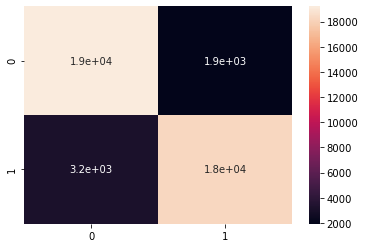

In [64]:
# RANDOM FOREST CLASSIFIER

model_rf = RandomForestClassifier(random_state=123)
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [69]:
# RANDOM FOREST CLASSIFIER using Grid Search

grid_array_rfc = {'max_depth': [1,2,3,4,5],
             'max_features': [1,2,3,4,5],
             'min_samples_leaf': [10,15,20],
             'min_samples_split': [90,100,110],
             'n_estimators': [50,100,150]}

In [70]:
grid_search_rfc = GridSearchCV(estimator=model_rf,param_grid=grid_array_rfc,scoring='f1',cv = 5,n_jobs=-1)

In [71]:
grid_search_rfc.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid_search_rfc.best_params_

In [ ]:
rfc_gs = grid_search_rfc.best_estimator_
rfc_gs

In [ ]:
y_pred = rf_gs.predict(x_valid)

print("Training Accuracy: ", rf_gs.score(x_train, y_train))
print('Testing Accuarcy: ', rf_gs.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

Training Accuracy:  0.8486260225591902
Testing Accuarcy:  0.8503509966426408
              precision    recall  f1-score   support

           0       0.85      0.84      0.85     21138
           1       0.85      0.86      0.85     21455

    accuracy                           0.85     42593
   macro avg       0.85      0.85      0.85     42593
weighted avg       0.85      0.85      0.85     42593



<AxesSubplot:>

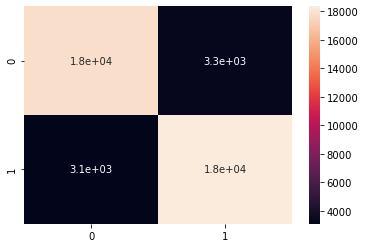

In [65]:
# ADA BOOST CLASSIFIER

model_ada = AdaBoostClassifier(random_state=123)
model_ada.fit(x_train, y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(x_train, y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

Training Accuracy:  0.9203787368060936
Testing Accuarcy:  0.8964853379663325
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21138
           1       0.94      0.85      0.89     21455

    accuracy                           0.90     42593
   macro avg       0.90      0.90      0.90     42593
weighted avg       0.90      0.90      0.90     42593



<AxesSubplot:>

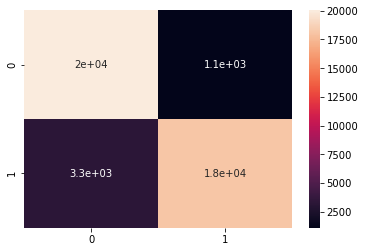

In [66]:
# Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier


model_xgb = XGBClassifier(random_state=123)
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

Training Accuracy:  0.8652888320940201
Testing Accuarcy:  0.8681003920832061
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     21138
           1       0.88      0.85      0.87     21455

    accuracy                           0.87     42593
   macro avg       0.87      0.87      0.87     42593
weighted avg       0.87      0.87      0.87     42593



<AxesSubplot:>

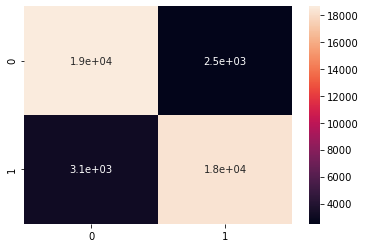

In [67]:
# Gradient Boost Classifier

model_gbc = GradientBoostingClassifier(random_state=123)
model_gbc.fit(x_train, y_train)

y_pred = model_gbc.predict(x_valid)

print("Training Accuracy: ", model_gbc.score(x_train, y_train))
print('Testing Accuarcy: ', model_gbc.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
sel = RFE(GradientBoostingClassifier(n_estimators=100,random_state=123, n_jobs=-1),n_features_to_select=15)

In [ ]:
sel.fit(x_train, y_train)

In [ ]:
x_train_rfe = sel.transform(x_train)
x_valid_rfe = sel.transform(x_valid)

In [ ]:
# Gradient Boost Classifier using Feature Selection RFE

model_gbc_rfe = GradientBoostingClassifier(random_state=123)
model_gbc_rfe.fit(x_train_rfe, y_train)

y_pred = model_gbc.predict(x_valid_rfe)

print("Training Accuracy: ", model_gbc_rfe.score(x_train_rfe, y_train))
print('Testing Accuarcy: ', model_gbc_rfe.score(x_valid_rfe, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
# Gradient Boosting Classifier using Grid Search

grid_array_gbc = {"n_estimators":[5,50,250,500],
                  "max_depth":[1,3,5,7,9],
                  "learning_rate":[0.01,0.1,1,10,100]}

In [ ]:
grid_search_gbc = GridSearchCV(model_gbc, grid_array_gbc, scoring='f1', cv = 5, n_jobs=-1)

In [ ]:
grid_search_gbc.fit(x_train,y_train)

In [ ]:
grid_search_gbc.best_params_

In [ ]:
gbc_gs = grid_search_gbc.best_estimator_
gbc_gs

In [ ]:
y_pred = gbc_gs.predict(x_valid)

print("Training Accuracy: ", gbc_gs.score(x_train, y_train))
print('Testing Accuarcy: ', gbc_gs.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

Training Accuracy:  0.8098065061429017
Testing Accuarcy:  0.8123400558777264
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21138
           1       0.82      0.81      0.81     21455

    accuracy                           0.81     42593
   macro avg       0.81      0.81      0.81     42593
weighted avg       0.81      0.81      0.81     42593



<AxesSubplot:>

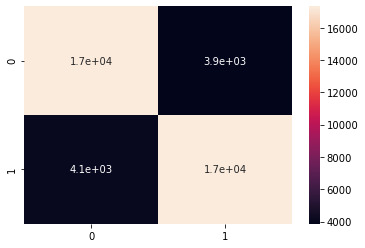

In [68]:
# Logistic Regression Classifier


model_lr = LogisticRegression(random_state=123)
model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_valid)

print("Training Accuracy: ", model_lr.score(x_train, y_train))
print('Testing Accuarcy: ', model_lr.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
# Logistic Regression using Grid Search

grid_array_lr = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [ ]:
grid_search_lr = GridSearchCV(model_lr, grid_array_lr, scoring='f1', cv = 5, n_jobs=-1)

In [ ]:
grid_search_lr.fit(x_train,y_train)

In [ ]:
grid_search_lr.best_params_

In [ ]:
lr_gs = grid_search_lr.best_estimator_
lr_gs

In [ ]:
y_pred = lr_gs.predict(x_valid)

print("Training Accuracy: ", lr_gs.score(x_train, y_train))
print('Testing Accuarcy: ', lr_gs.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

Training Accuracy:  0.8804322670879325
Testing Accuarcy:  0.8206747587631771
              precision    recall  f1-score   support

           0       0.87      0.75      0.81     21138
           1       0.78      0.89      0.83     21455

    accuracy                           0.82     42593
   macro avg       0.83      0.82      0.82     42593
weighted avg       0.83      0.82      0.82     42593



<AxesSubplot:>

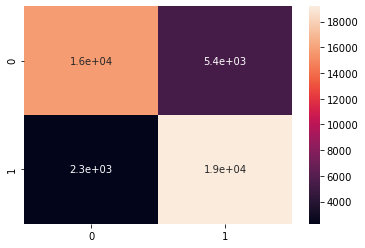

In [74]:
# KNeighbors Classifier 


model_knn = KNeighborsClassifier(random_state=123)
model_knn.fit(x_train, y_train)

y_pred = model_knn.predict(x_valid)

print("Training Accuracy: ", model_knn.score(x_train, y_train))
print('Testing Accuarcy: ', model_knn.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
# Support Vector Classifier

model_svc = SVC(kernel="linear")
model_svc.fit(x_train, y_train)

y_pred = model_svc.predict(x_valid)

print("Training Accuracy: ", model_svc.score(x_train, y_train))
print('Testing Accuarcy: ', model_svc.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [79]:
# let's predict for the tests set

y_pred_rf = model_rf.predict(x_test)
y_pred_ada = model_ada.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)
y_pred_gbc = model_gbc.predict(x_test)
y_pred_lr = model_lr.predict(x_test)
y_pred_knn = model_knn.predict(x_test)
y_pred_svc = model_svc.predict(x_test)

In [71]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'ID': unique_id,'Loan/No Loan': y_pred_lr})

#Visualize the first 5 rows
submission.head()

,ID,Loan/No Loan
0,198980,0
1,167688,0
2,198768,1
3,192564,1
4,151199,1


In [72]:
#Convert DataFrame to a csv file that can be uploaded

piyush = 'submission1.csv'

submission.to_csv(piyush,index=False)

print('Saved file: ' + piyush)

Saved file: submission1.csv
